<a href="https://colab.research.google.com/github/AtomZa/OptizySimulation/blob/main/smf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
from scipy.special import jv
from scipy.special import kv
from scipy.optimize import root_scalar
import math

# Optical Parameters

In [93]:
ncoresmf = 1.4504;
ncladdingsmf = 1.447;
asmf = 4.1;
ncoremmf = 1.443;
nmedium = 1.04641231840654;
ncladdingmmf = nmedium;
ammf = 62.5;
zmmf = 57713;
epscoresmf = math.pow(ncoresmf, 2);
epscladdingsmf = math.pow(ncladdingsmf, 2);
epscoremmf = math.pow(ncoremmf, 2);
epscladdingmmf = math.pow(ncladdingmmf, 2);
lamb = 0.3;
k0 = 2*math.pi/lamb;
aair = 72.5;
dx = 0.0001;
ifinal = ((ncoresmf - ncladdingsmf)/dx);

# Find Effective Index

In [94]:
def func(neff,epscoresmf,epscladdingsmf,k0,asmf):
    return ((jv(0,k0*asmf*math.sqrt(epscoresmf - math.pow(neff,2))))*(k0*asmf*math.sqrt(math.pow(neff,2) - epscladdingsmf))*(kv(1,k0*asmf*math.sqrt(math.pow(neff,2) - epscladdingsmf)))) - ((kv(0,k0*asmf*math.sqrt(math.pow(neff,2) - epscladdingsmf)))*(k0*asmf*math.sqrt(epscoresmf - math.pow(neff,2)))*(jv(1,k0*asmf*math.sqrt(epscoresmf - math.pow(neff,2)))));

In [95]:
neffarrsmf = 0;
for i in range(round(ifinal)):
  try:
    sol = root_scalar(func, args=(epscoresmf, epscladdingsmf, k0, asmf), method='toms748', bracket=[ncoresmf-((i+1)*dx), ncoresmf-(i*dx)])
    neffarrsmf = sol.root
    break
  except:
    pass

# Singlemode

In [96]:
usmf =  k0*asmf*math.sqrt(math.pow(ncoresmf,2) - math.pow(neffarrsmf,2));   
wsmf =  k0*asmf*math.sqrt(math.pow(neffarrsmf,2) - math.pow(ncladdingsmf,2));

In [97]:
rarrsmf = np.arange(-asmf, asmf, 0.01);
rarrcladding1 = np.arange(-ammf, -asmf-0.01, 0.01);
rarrcladding2 = np.arange(asmf+0.01, ammf, 0.01);
rarrair1 = np.arange(-aair, -ammf-0.01, 0.01);
rarrair2 = np.arange(ammf+0.01, aair, 0.01);
rarrall = np.concatenate((rarrair1, rarrcladding1, rarrsmf, rarrcladding2, rarrair2), axis=None)
print(rarrall)

[-72.5  -72.49 -72.48 ...  72.48  72.49  72.5 ]


In [98]:
ecoresmf = jv(0,(usmf*rarrsmf/asmf));
c = (jv(0,usmf))/(kv(0,wsmf));
ecladdingsmf2 = c*(kv(0,(wsmf*rarrcladding2/asmf)));
ecladdingsmf1 = np.zeros(np.size(ecladdingsmf2))
eair1 = np.zeros(np.size(rarrair1));
eair2 = np.zeros(np.size(rarrair2));
eall =  np.concatenate((eair1, ecladdingsmf1, ecoresmf, ecladdingsmf2, eair2), axis=None)

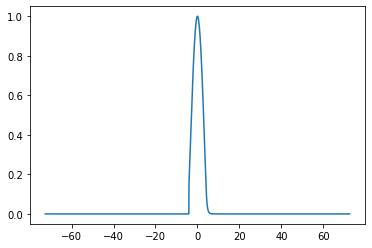

In [100]:
from matplotlib import pyplot as plt
plt.plot(rarrall,eall)
plt.show()